# CS F407 AI Project
## Title - Recommender System

### TEAM - 7
### Group Member Details
### Aditya Dhanekula (Leader)         - 2020A7PS0205H
### Dev Bansal                                   - 2020A7PS2051H
### Ayush Khandelwal                       - 2020A7PS2076H
### Manan Gupta                                - 2020A2PS2420H

Search Algorithms Implemented in our Project
1. Genetic Algorithm
2. Ant Colony Optimization Search Algorithm
3. Particle Swarm Optimization Search Algorithm
4. Depth First Search Algorithm
5. Simulated Annealing Algorithm

Other Algorithms Implemented:
1. K-Nearest Neighbours

Additionally we have implemented:
1. Content based recommendation using cosine similarity metric.
2. Collaborative recommendation using K-Nearest Neighbours.

In [75]:
#Importing the common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.neighbors import NearestNeighbors
import missingno as msno

In [76]:
#Loading the books dataset.
df_books = pd.read_csv("Books.csv", delimiter=",",usecols = [0,1,2,3,4])
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


C:\Users\dhane\AppData\Local\Temp\ipykernel_3644\1933266058.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv("Books.csv", delimiter=",",usecols = [0,1,2,3,4])


The Books dataset contains several attributes regarding the books which include:
1. ISBN of the book
2. Book Title
3. Book Author
4. Year Of Publication
5. Publisher

In [77]:
#Cleaning the dataset
try:
    df_books['Year-Of-Publication']  = df_books['Year-Of-Publication'].astype(int)
except Exception as e:
    print(e)

invalid literal for int() with base 10: 'DK Publishing Inc'


In [78]:
#Clean the records having incorrect Year of Publication
df_books[df_books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [79]:
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'],errors='coerce')

In [80]:
# Preprocessing the dataset by dropping rows having null values.
df_books = df_books.dropna()
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)

C:\Users\dhane\AppData\Local\Temp\ipykernel_3644\240026309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)


In [81]:
#Viewing the sample data from the books data.
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


<BarContainer object of 116 artists>

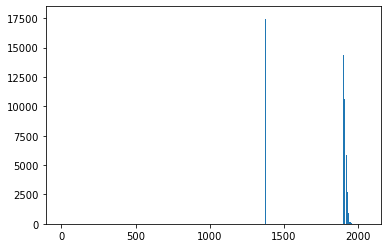

In [82]:
#Visualizing the dataset by plotting the count of books in a particular year.
plt.bar(pd.DataFrame(df_books['Year-Of-Publication'].value_counts()).sort_index().index, np.array(df_books['Year-Of-Publication'].value_counts()), width = 1)

In [83]:
#Loading the data of the users into a dataframe
df_Users = pd.read_csv("Users.csv")
df_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


<AxesSubplot:>

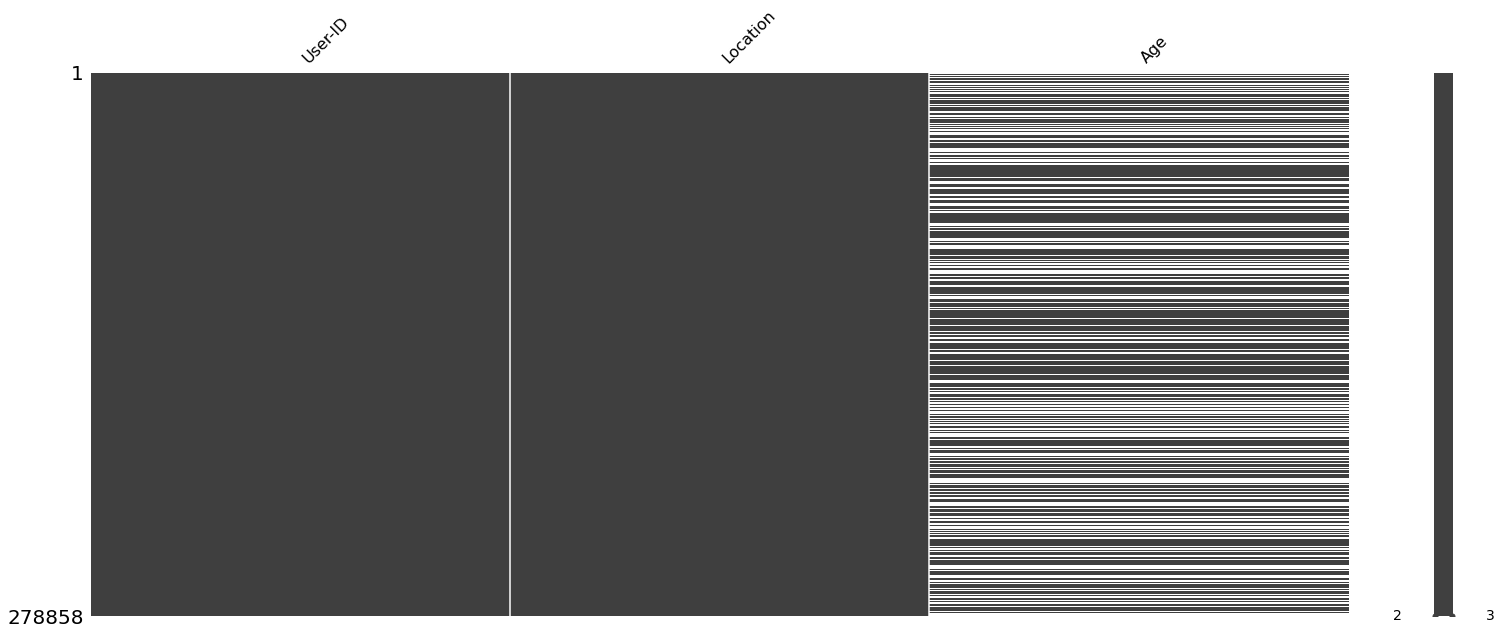

In [84]:
#Plotting the matrix which figuratively shows the number of missing values in the dataset
msno.matrix(df_Users)

In [85]:
#Loading the ratings dataset
df_rating = pd.read_csv("Ratings.csv")
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


We will mainly be working with the ratings dataset in the corresponding search algorithms.
From the rating data, we can see that we have 3 columns as follows:
1. User-ID: The User ID. This one is unique for each user
2. ISBN : some sort of the ID for the book being read by the user
3. Rating: Ratings given by the user for the book.

The sample above showed that user 276725 has given book with ISBN 034545104X a rating of 0.

In [86]:
#Printing the amount of data available before and after preprocessing
print('Number of data before cleaning : {}'.format(len(df_rating)))
df_rating = df_rating[df_rating['ISBN'].isin(df_books['ISBN'])]
print('Number of data after cleaning : {}'.format(len(df_rating)))

Number of data before cleaning : 1149780
Number of data after cleaning : 1031129


In [87]:
#Filtering the rating dataset 
f = ['count','mean']

df_books_summary = df_rating.groupby('ISBN')['Book-Rating'].agg(f)
df_books_summary.index = df_books_summary.index.map(str)

drop_book_list = df_books_summary[df_books_summary['count'] < 10].index

df_cust_summary = df_rating.groupby('User-ID')['Book-Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)

drop_cust_list = df_cust_summary[df_cust_summary['count'] < 10].index

In [88]:
#Printing the amount of rating data available before and after filtering
print('Before Filtering: {}'.format(df_rating.shape))
df_rating = df_rating[~df_rating['ISBN'].isin(drop_book_list)]
df_rating = df_rating[~df_rating['User-ID'].isin(drop_cust_list)]
print('After Filtering: {}'.format(df_rating.shape))

Before Filtering: (1031129, 3)
After Filtering: (428085, 3)


### Genetic Algorithm based book recommendation for a new user

We first proceed by constructing the pivot table which will serve as the user-item interaction matrix

In [89]:
pivot_rating = df_rating.pivot(index='User-ID',columns='ISBN',values='Book-Rating')
pivot_rating.head()

ISBN,0002005018,0002251760,0002255081,0002257203,0002259834,0002558122,0006480764,000648302X,0006485200,0006485936,...,950491036X,958704049X,9681336089,9681500830,9681500954,9724119378,9726101794,9871138016,9871138148,B00009EF82
User-ID,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#We then process the pivot table by replacing all the NaN values with 0
pivot_rating = pivot_rating.fillna(0)
pivot_rating.head()

ISBN,0002005018,0002251760,0002255081,0002257203,0002259834,0002558122,0006480764,000648302X,0006485200,0006485936,...,950491036X,958704049X,9681336089,9681500830,9681500954,9724119378,9726101794,9871138016,9871138148,B00009EF82
User-ID,,,,,,,,,,,,,,,,,,,,,
8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
#We use the below method to observe the statistics related to each Book accumulated over all the users
pivot_rating.describe()

ISBN,0002005018,0002251760,0002255081,0002257203,0002259834,0002558122,0006480764,000648302X,0006485200,0006485936,...,950491036X,958704049X,9681336089,9681500830,9681500954,9724119378,9726101794,9871138016,9871138148,B00009EF82
count,11598.000000,11598.000000,11598.000000,11598.0,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,...,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.000000,11598.0,11598.000000,11598.000000
mean,0.003708,0.003880,0.001552,0.0,0.001897,0.002156,0.001897,0.002759,0.001466,0.002156,...,0.006553,0.003449,0.002069,0.002069,0.002156,0.000862,0.001380,0.0,0.003794,0.002242
std,0.165811,0.191396,0.102555,0.0,0.118176,0.134228,0.105859,0.149129,0.113340,0.134228,...,0.250119,0.167627,0.128654,0.133263,0.135507,0.092856,0.091916,0.0,0.185216,0.140811
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,9.000000,10.000000,8.000000,0.0,8.000000,9.000000,8.000000,9.000000,10.000000,9.000000,...,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,8.000000,0.0,10.000000,10.000000


In [92]:
#We then proceed by converting the pivot table into a numpy array in order to run the genetic algorithm
pivot_rating_arr = pivot_rating.to_numpy()
pivot_rating_arr

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
pivot_rating_arr.shape

(11598, 17478)

In [94]:
#We make a copy of the array to implement the genetic algorithm
data_copy = np.copy(pivot_rating_arr)
item_ratings = np.mean(data_copy, axis=0)

In [95]:
num_rows = pivot_rating_arr.shape[0]
num_cols = pivot_rating_arr.shape[1]

In [96]:
#Setting the parameters of the genetic algorithm
POPULATION_SIZE = 50
NUM_GENERATIONS = 100
MUTATION_PROBABILITY = 0.1

In [97]:
# Define the fitness function
def fitness(individual):
    #Fitness function chosen for implementing the genetic algorithm is the negative of the Sum of Squared Errors.
    #This indicates that increasing modulus of sum of squares of error reduces the fitness of the individual in the population.
    #As we want to increase the fitness among individuals as iterations proceed, we chose the negative of SSE as the fitness measure.
    return -np.sum((item_ratings - individual)**2)


In [98]:
# Define the crossover function
def crossover(parent1, parent2):
    # Create a child by selecting alternating values from the parents
    child = np.zeros_like(parent1)
    child[::2] = parent1[::2]
    child[1::2] = parent2[1::2]
    return child

In [99]:
# Define the mutation function
def mutation(individual):
    # Randomly change some of the values in the individual
    for i in range(len(individual)):
        if np.random.rand() < MUTATION_PROBABILITY:
            individual[i] = np.random.randint(1, 11)
    return individual

In [100]:
# Generate the initial ranodm population
population = np.random.randint(1, 11, size=(POPULATION_SIZE, num_cols))

In [101]:
best_fitness_scores = []
# Run the genetic algorithm
for generation in range(NUM_GENERATIONS):
    # Evaluate the fitness of each individual
    fitness_scores = np.array([fitness(individual) for individual in population])
    best_fitness_scores.append(np.max(fitness_scores))
    # Select the parents for the next generation
    parent_indices = np.random.choice(range(POPULATION_SIZE), size=POPULATION_SIZE, replace=True, p=fitness_scores/np.sum(fitness_scores))
    parents = population[parent_indices]
    # Create the next generation
    next_generation = np.zeros_like(population)
    for i in range(POPULATION_SIZE):
        parent1 = parents[i]
        parent2 = parents[np.random.randint(0, POPULATION_SIZE)]
        child = crossover(parent1, parent2)
        child = mutation(child)
        next_generation[i] = child
    population = next_generation
best_individual = population[np.argmax([fitness(individual) for individual in population])] 

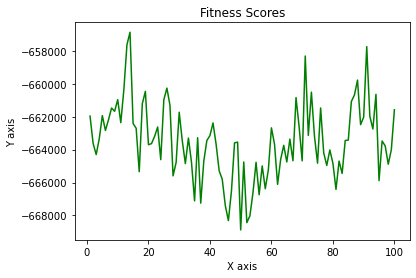

In [102]:
# Plotting the fitness values as iterations proceed
x = np.arange(1, NUM_GENERATIONS+1)
y = best_fitness_scores
 
# plotting
plt.title("Fitness Scores")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()

In [103]:
# Printing the fittest individual among the population
print('Best individual:', best_individual)

Best individual: [10  1 10 ...  2  9  4]


In [104]:
#Evaluating the performance of genetic algorithm by calculating the error metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Calculating the mean squared error obtained after running the genetic algorithm
mse = mean_squared_error(item_ratings, best_individual)
print(mse)
#Calculating the root mean squared error obtained after running the genetic algorithm
rmse = np.sqrt(mse)
print(rmse)
#Calculating the mean absolute error obtained after running the genetic algorithm
mae = mean_absolute_error(item_ratings, best_individual)
print(mae)

37.98577344833859
6.163259969232078
5.461260776265015


As seen from the rmse and mae values, the genetic algorithm has converged to an optimal recommendation (ideal individual in the context of genetic algorithm) and hence we can proceed by generating the corresponding recommendations.

In [105]:
#We then pick the top 20 recommended books from the list of optimal recommendations and suggest them to the new user
max_rating = best_individual[np.argmax(best_individual)]
recommended_book_indices = np.where(best_individual == max_rating)[0]
ISBN_list = pivot_rating.columns[recommended_book_indices]
n_recommend = 20
recommended_book_list = []
for i in range (n_recommend):
    index = df_books.loc[df_books['ISBN'] == ISBN_list[i]]
    recommended_book_list.append(index.iloc[0, 1:5])
recommended_book_list

[Book-Title                      Clara Callan
 Book-Author             Richard Bruce Wright
 Year-Of-Publication                     2001
 Publisher              HarperFlamingo Canada
 Name: 1, dtype: object,
 Book-Title                         Spadework
 Book-Author                  Timothy Findley
 Year-Of-Publication                     2001
 Publisher              HarperFlamingo Canada
 Name: 69955, dtype: object,
 Book-Title                      Swimmer
 Book-Author                 Bill Broady
 Year-Of-Publication                2003
 Publisher              Trafalgar Square
 Name: 88827, dtype: object,
 Book-Title             Unless: A Novel
 Book-Author              Carol Shields
 Year-Of-Publication               2002
 Publisher                Fourth Estate
 Name: 26355, dtype: object,
 Book-Title                     The Magician's Nephew
 Book-Author                              C. S. Lewis
 Year-Of-Publication                             1970
 Publisher              MacMillan 

### Ant Colony Optimization Search based book recommendation for a new user

In [106]:
#Copying the dataset
data_copy = np.copy(pivot_rating_arr)
item_ratings = np.mean(data_copy, axis=0)

In [107]:
# Define the parameters of the search algorithm
# Define the number of ants, the maximum number of iterations, the pheromone decay rate, and the pheromone constant
num_ants = 20
max_iterations = 50
pheromone_decay_rate = 0.5
pheromone_constant = 1.0

In [108]:
# Define the fitness function
def fitness(individual):
    #Fitness function chosen for implementing the ACO algorithm is the negative of the Sum of Squared Errors.
    #This indicates that increasing modulus of sum of squares of error reduces the fitness of the individual in the population.
    #As we want to increase the fitness among individuals as iterations proceed, we chose the negative of SSE as the fitness measure.
    return -np.sum((item_ratings - individual)**2)

In [109]:
fitness_history = []
# Define the ACO function
def aco_search(num_ants, max_iterations, pheromone_decay_rate, pheromone_constant):
    # Initialize the pheromone matrix and the best individual and fitness values for the swarm
    # initialize all the pheromone values with 1.
    pheromone = np.ones((num_rows, num_cols))
    best_individual = None
    #Take initial best fitness to be minus infinity
    best_fitness = -np.inf
    # Run the ACO algorithm
    for iteration in range(max_iterations):
        # Initialize the positions and the fitness values of the ants with random values
        positions = np.random.uniform(1, 10, size=(num_ants, num_cols))
        fitness_values = np.array([fitness(individual) for individual in positions])
        # Update the pheromone matrix
        pheromone *= pheromone_decay_rate
        for i in range(num_ants):
            for j in range(num_rows):
                pheromone[j][int(positions[i][j])-1] += pheromone_constant*fitness_values[i]/np.sum(fitness_values)
        # Choose the best individual and the corresponding fitness value
        if np.max(fitness_values) > best_fitness:
            best_individual = np.copy(positions[np.argmax(fitness_values)])
            best_fitness = np.max(fitness_values)
        fitness_history.append(best_fitness)
    # Return the best individual and the corresponding fitness value
    return best_individual, best_fitness

In [110]:
# Run the ACO search and printing the optimal recommendation
best_individual, best_fitness = aco_search(num_ants, max_iterations, pheromone_decay_rate, pheromone_constant)
print("Best individual:", best_individual)
print("Best fitness:", best_fitness)

Best individual: [1.10284028 7.21295593 8.2885186  ... 4.51417239 6.00153956 5.14602977]
Best fitness: -634767.0409670693


In [111]:
#Evaluating the performance of ACO search algorithm by calculating the error metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Calculating the mean squared error obtained after running the ACO search algorithm
mse = mean_squared_error(item_ratings, best_individual)
print(mse)
#Calculating the root mean squared error obtained after running the ACO search algorithm
rmse = np.sqrt(mse)
print(rmse)
#Calculating the mean absolute error obtained after running the ACO search algorithm
mae = mean_absolute_error(item_ratings, best_individual)
print(mae)

36.3180593298472
6.026446658674347
5.446998516005351


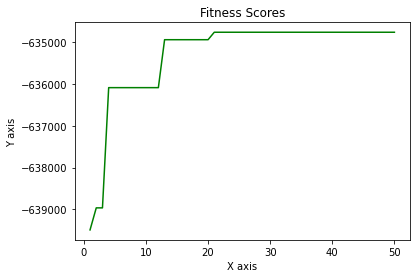

In [112]:
# Plotting the fitness values as iterations proceed
x = np.arange(1, max_iterations+1)
y = fitness_history
 
# plotting
plt.title("Fitness Scores")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()

In [113]:
#We then pick the top 20 recommended books from the list of optimal recommendations and suggest them to the new user
max_rating = best_individual[np.argmax(best_individual)]
recommended_book_indices = np.where(best_individual >= max_rating-0.1)[0]
ISBN_list = pivot_rating.columns[recommended_book_indices]
n_recommend = 20
recommended_book_list = []
for i in range (n_recommend):
    index = df_books.loc[df_books['ISBN'] == ISBN_list[i]]
    recommended_book_list.append(index.iloc[0, 1:5])
recommended_book_list

[Book-Title             More Sniglets: Any Word That Doesn't Appear in...
 Book-Author                                                    Rich Hall
 Year-Of-Publication                                                 1985
 Publisher                                           Simon &amp; Schuster
 Name: 27776, dtype: object,
 Book-Title                Voyage of the Dawn Treader
 Book-Author                              C. S. Lewis
 Year-Of-Publication                             1970
 Publisher              MacMillan Publishing Company.
 Name: 2997, dtype: object,
 Book-Title              Veronika Decides to Die
 Book-Author                        Paulo Coelho
 Year-Of-Publication                        2000
 Publisher              HarperCollins Publishers
 Name: 32368, dtype: object,
 Book-Title             Vendetta: Lucky's Revenge
 Book-Author                       Jackie Collins
 Year-Of-Publication                         1997
 Publisher                          Harpercollins
 Name:

### Particle Swarm Optimization Search For Book Recommendation to a new User

In [114]:
data_copy = np.copy(pivot_rating_arr)
item_ratings = np.mean(data_copy, axis=0)

In [115]:
# Define the data matrix of user-item ratings
# Define the number of particles, the maximum number of iterations, and the inertia weight
num_particles = 10
max_iterations = 5
inertia_weight = 1

In [116]:
# Define the fitness function
def fitness(individual):
    #Fitness function chosen for implementing the genetic algorithm is the negative of the Sum of Squared Errors.
    #This indicates that increasing modulus of sum of squares of error reduces the fitness of the individual in the population.
    #As we want to increase the fitness among individuals as iterations proceed, we chose the negative of SSE as the fitness measure.
    #Return the sum of the squared differences between the item ratings and the individual's preferences
    return -np.sum((item_ratings - individual)**2)

In [117]:
# Define the PSO function
pso_fitness_history = []
def pso_search(num_particles, max_iterations, inertia_weight):
    # Initialize the particles, the best positions, and the best fitness values for the swarm
    particles = np.random.randint(1, 10, size=(num_particles, num_cols))
    best_positions = np.copy(particles)
    best_fitnesses = np.array([fitness(individual) for individual in particles])
    # Initialize the global best position and the global best fitness value for the swarm
    global_best_position = np.copy(best_positions[np.argmax(best_fitnesses)])
    global_best_fitness = np.max(best_fitnesses)
    # Run the PSO algorithm
    for iteration in range(max_iterations):
        # Update the inertia weight
        inertia_weight = (max_iterations - iteration)/max_iterations * (0.5 - inertia_weight) + inertia_weight
        # Update the velocity and the position of each particle
        for i in range(num_particles):
            velocity = inertia_weight*particles[i] + np.random.uniform(0, 1)*(best_positions[i] - particles[i]) + np.random.uniform(0, 1)*(global_best_position - particles[i])
            # Evaluate the fitness of the particle's position
            fitness_value = fitness(particles[i])
            pso_fitness_history.append(fitness_value)
            # Update the best position and the best fitness value for the particle
            if fitness_value > best_fitnesses[i]:
                best_positions[i] = np.copy(particles[i])
                best_fitnesses[i] = fitness_value
            # Update the global best position and the global best fitness value for the swarm
            if fitness_value > global_best_fitness:
                global_best_position = np.copy(particles[i])
                global_best_fitness = fitness_value   
    # Return the global best position and the global best fitness value for the swarm
    return global_best_position, global_best_fitness

In [118]:
# # Run the ACO search and printing the optimal recommendation
best_position, best_fitness = pso_search(num_particles, max_iterations, inertia_weight)
print("Best position:", best_position)
print("Best fitness:", best_fitness)

Best position: [1 7 3 ... 3 3 6]
Best fitness: -543772.9656778804


In [119]:
#Evaluating the performance of PSO search algorithm by calculating the error metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Calculating the mean squared error obtained after running the PSO search algorithm
mse = mean_squared_error(item_ratings, best_position)
print(mse)
#Calculating the root mean squared error obtained after running the PSO search algorithm
rmse = np.sqrt(mse)
print(rmse)
#Calculating the mean absolute error obtained after running the PSO search algorithm
mae = mean_absolute_error(item_ratings, best_position)
print(mae)

31.111852939574348
5.577800008925951
4.943466978347634


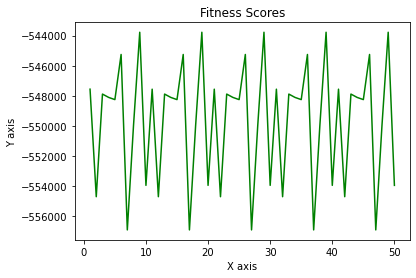

In [120]:
# Plotting the fitness values of all particles as iterations proceed
x = np.arange(1, max_iterations*num_particles+1)
y = pso_fitness_history
 
# plotting
plt.title("Fitness Scores")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()

In [121]:
#We then pick the top 20 recommended books from the list of optimal recommendations and suggest them to the new user
max_rating = best_position[np.argmax(best_position)]
recommended_book_indices = np.where(best_position >= max_rating)[0]
ISBN_list = pivot_rating.columns[recommended_book_indices]
n_recommend = 20
recommended_book_list = []
for i in range (n_recommend):
    index = df_books.loc[df_books['ISBN'] == ISBN_list[i]]
    recommended_book_list.append(index.iloc[0, 1:5])
recommended_book_list

[Book-Title                          FUTON FEVER
 Book-Author                       Dawn Anderson
 Year-Of-Publication                        2000
 Publisher              HarperCollins Publishers
 Name: 26550, dtype: object,
 Book-Title                  Postcards
 Book-Author            E Annie Proulx
 Year-Of-Publication                 0
 Publisher                    Flamingo
 Name: 55422, dtype: object,
 Book-Title               ETHAN FROME
 Book-Author            Edith Wharton
 Year-Of-Publication             1987
 Publisher                   Scribner
 Name: 113743, dtype: object,
 Book-Title             The Last Battle (The Chronicles of Narnia Book 7)
 Book-Author                                                  C. S. Lewis
 Year-Of-Publication                                                 1970
 Publisher                                  MacMillan Publishing Company.
 Name: 25226, dtype: object,
 Book-Title             A Farewell to Arms (A Scribner Classic)
 Book-Author       

## Depth First Search Algorithm for Book Recommendation

In [122]:
ratings = pivot_rating_arr

In [123]:
def dfs(start, ratings, visited=set(), stack=[], scores={}):
    # Visit the start node if it hasn't been visited before
    if start not in visited:
        visited.add(start)

        # If node is a user, visit its top-rated item neighbors
        if start < ratings.shape[0]:
            top_rated_items = np.argsort(ratings[start])[::-1]
            for item in top_rated_items:
                dfs(item + ratings.shape[0], ratings, visited, stack, scores)

        # If node is an item, we will score it based on user ratings
        else:
            item = start - ratings.shape[0]
            score = np.sum(ratings[:, item] > 3)  # scoring function
            scores[start] = score

    return visited, stack, scores

# Starting point
start = 0  # User 0

# Initialize visited nodes, stack, and scores dictionary
visited, stack, scores = dfs(start, ratings)

# Sort and recommend the top items based on scores
if len(scores) > 0:
    recommendations = sorted(scores.items(), key=lambda x: x[1], reverse=True)

recommendations = np.array(recommendations)
recommendations = recommendations[:20, 0]

The input start is the starting node, which represents a user. The ratings input is a two-dimensional numpy array where each row represents a user and each column represents an item. The elements of the ratings array represent the ratings given by the corresponding user to the corresponding item.

The visited input is a set that keeps track of visited nodes, while the stack input is a list that keeps track of the order of nodes visited during the search. The scores input is a dictionary that stores the scores of each item, which are computed based on the number of users who rated the item higher than 3.

The algorithm starts by visiting the starting node (a user). Then, for each item that the user rated highly, the algorithm visits the corresponding node (an item). For each item visited, the algorithm computes its score based on the ratings of all users who rated the item higher than 3. The scores are stored in the scores dictionary.

Once all nodes have been visited, the algorithm sorts the items in decreasing order of score and returns the top 20 items as recommendations.

In [124]:
#We then pick the top 20 recommended books from the list of optimal recommendations and suggest them to the new user
for i in range (20):
    index = recommendations[i]
    row = df_books.iloc[index]
    print(row)
    print("\n")

ISBN                         037321877X
Book-Title             Dangerous Affair
Book-Author            Jayne Ann Krentz
Year-Of-Publication                2004
Publisher                    Silhouette
Name: 14185, dtype: object


ISBN                                                  0373190255
Book-Title             Male Animal (Silhouette Romance, No 1025)
Book-Author                                        Suzanne Carey
Year-Of-Publication                                         1994
Publisher                                             Silhouette
Name: 17226, dtype: object


ISBN                                  0297643347
Book-Title                       Women in Purple
Book-Author                        Judith Herrin
Year-Of-Publication                         2001
Publisher              Weidenfeld &amp; Nicolson
Name: 13639, dtype: object


ISBN                                                          014046560X
Book-Title             How to Draw the Human Head: Techniques and Ana.

## Simulated Annealing for Book Recommendation

In [125]:
rating_matrix = pivot_rating_arr[9:10]

Simulated Annealing algorithm for book recommender system
    
Parameters:
1. rating_matrix: numpy array, user-item rating matrix
2. max_iter: int, maximum number of iterations
3. init_temp: float, initial temperature
4. alpha: float, cooling rate

Returns:
numpy array, binary matrix indicating recommended books for each user

In [126]:
import random
def SA(rating_matrix, max_iter=100, init_temp=100, alpha=0.95):
    
    # Store the number of users and number of books
    n_users, n_books = rating_matrix.shape
    
    # Initialize binary matrix indicating recommended books
    recommended_books = np.zeros((n_users, n_books))
    
    # Initialize current state
    current_books = np.zeros((n_users, n_books))
    
    #Initialize current energy
    current_energy = np.inf
    
    # Initialize temperature with the initial temperature
    current_temp = init_temp
    
    # Loop over iterations
    for i in range(max_iter):
        # Generate a new state by randomly flipping a book recommendation
        new_books = current_books.copy()
        user_idx = random.randint(0, n_users-1)
        book_idx = random.randint(0, n_books-1)
        new_books[user_idx, book_idx] = 1 - new_books[user_idx, book_idx]
        
        # Compute energy of the new state
        new_energy = energy(new_books, rating_matrix)
        energy_history.append(new_energy)
        
        # Compute energy difference between new and current state
        delta_energy = new_energy - current_energy
        delta_energy_history.append(delta_energy)
        # If new state has lower energy, accept it
        if delta_energy < 0:
            current_books = new_books
            current_energy = new_energy
        # If new state has higher energy, accept it with probability
        else:
            prob = np.exp(-delta_energy/current_temp)
            if np.random.rand() < prob:
                current_books = new_books
                current_energy = new_energy
        
        # Update temperature
        current_temp *= alpha
        temperature_history.append(current_temp)
        
    # Set recommended books for each user based on the final state
    recommended_books = current_books
    return recommended_books

Compute energy of the book recommendation state
    
Parameters:
1. books: numpy array, binary matrix indicating recommended books for each user
2. rating_matrix: numpy array, user-item rating matrix

Returns:
float, energy of the book recommendation state

In [127]:
def energy(books, rating_matrix):
    # Compute sum of squared error between rating matrix and recommended books
    error = rating_matrix - rating_matrix*books
    energy = np.sum(error**2)
    
    return energy

In [128]:
#Setting the parameters needed for Simulated Annealing
max_iter = 100
init_temp = 100
alpha = 0.95
energy_history = []
delta_energy_history = []
temperature_history = []
recommendations = SA(rating_matrix, max_iter, init_temp, alpha)

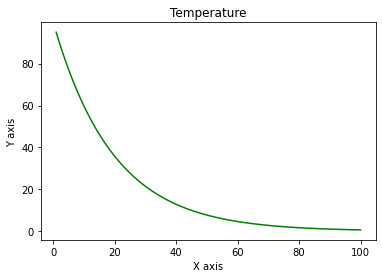

In [129]:
#Plotting temperature vs iterations
x = np.arange(1, max_iter+1)
y = temperature_history
 
# plotting
plt.title("Temperature")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()

We can clearly observe that the temperature reduces as iterations proceed and hence the algorithm will be chosing a sub-optimal solution with a much lower probability as iterations proceed. Hence, after sufficient iterations the algorithm converges to the optimal recommendation.

In [130]:
#We then pick the top 20 recommended books from the list of optimal recommendations and suggest them to the new user
recommended_book_indices = np.where(recommendations == 1)[1]
for i in range (20):
    index = recommended_book_indices[i]
    row = df_books.iloc[index]
    print(row)
    print("\n")

ISBN                          8420639133
Book-Title               Temor y Temblor
Book-Author            Soren Kierkegaard
Year-Of-Publication                 2001
Publisher                        Alianza
Name: 146, dtype: object


ISBN                                                 0679427430
Book-Title             Wouldn't Take Nothing for My Journey Now
Book-Author                                        MAYA ANGELOU
Year-Of-Publication                                        1993
Publisher                                          Random House
Name: 415, dtype: object


ISBN                                            0312195516
Book-Title             The Red Tent (Bestselling Backlist)
Book-Author                                  Anita Diamant
Year-Of-Publication                                   1998
Publisher                                      Picador USA
Name: 522, dtype: object


ISBN                     0373484100
Book-Title              Night Tales
Book-Author            Nora

### Content Based Recommendation using Cosine Similarity
1. Content-based collaborative recommendation works by looking at a certain product that a user has liked or rated highly in the past then proceeds to recommend a product that is similar to the highly-rated product.
2. The following algorithm will take userId as an input and recommend books to the user.
3. The algorithm then will proceed to find the highest-rated book by the user and then recommend several other books that are similar to the highest-rated book

In [131]:
pivot_rating = df_rating.pivot(index='ISBN',columns='User-ID',values='Book-Rating')
pivot_rating.head()

User-ID,8,99,242,243,254,383,388,408,424,446,...,278522,278535,278554,278563,278582,278633,278637,278771,278843,278851
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002251760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002255081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002257203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002259834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Content-based recommendation based on the author and publisher of the book

This recommendation is made based on an assumption that a certain reader will be attracted to read another book based factors below:
1. Authors
Some readers might be attracted to some certain authors because some authors tends to write about a specific genre that certain demographic of reader like. So, including auhtor as one of the factor might be plausible.

2. Year-of-publication
Year of publication might reflect some kind of genre preferred by readers (e.g. reader who would like to read classical philosophy books might tend to read older books compared to new ones).

3. Publisher
Certain publisher has a certain kind of credibility which might make some book readers prefer one publisher compared to other.

Based on that consideration, we will consider Author, Year of publication, as well as publisher as basis for recommendation.

In [132]:
len(df_books['ISBN'].unique())

271354

There are around 270000 different books based on what we have in this dataset. For now, we will limit the recommendation only for books that are considered credible based on our definition when we clean the data. Hence, we will only pick books featured in the df_rating dataframe.

After cleaning, we are left with:

In [133]:
print ("number of books: " + str(len(df_books[df_books['ISBN'].isin(df_rating['ISBN'].unique())].copy())))

number of books: 17478


In [134]:
#Preprocessing the dataset
features = ['Book-Author', 'Year-Of-Publication', 'Publisher']

df_books_preprocess = df_books[df_books['ISBN'].isin(df_rating['ISBN'].unique())].copy()


for feature in features:
    if df_books_preprocess[feature].dtype == 'O':
        df_books_preprocess[feature]=df_books_preprocess[feature].str.replace('\W', '', regex=True)
        df_books_preprocess[feature] =  df_books_preprocess[feature].apply(lambda x: str.lower(x))

In [135]:
def create_soup(x):
    return x['Book-Author'] + ' ' + str(x['Year-Of-Publication'])+ ' ' + x['Publisher']

df_books_preprocess['soup'] = df_books_preprocess[features].apply(create_soup, axis = 1)

This method applies the vectorization process to the text data in the "soup" column and returns a sparse matrix representation of the resulting count vectors.

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_books_preprocess['soup'])

In [137]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [138]:
#Reset the indices after preprocessing
df2 = df_books_preprocess.reset_index()
indices = pd.Series(df2.index, index=df2['ISBN'])

In [139]:
def recommend_books(ISBN, cosine_sim):
    # Get the index of the books that matches the ISBN
    idx = indices[ISBN]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return df2[['Book-Title','soup']].iloc[book_indices], sim_scores

def get_recommendations(userid, cosine_sim):
    #userid = str(userid)
    ISBN = df_rating['ISBN'].loc[df_rating[df_rating['User-ID'] == userid]['Book-Rating'].idxmax()]

    recommendation, sim_score = recommend_books(ISBN, cosine_sim)

    df_recommend = pd.DataFrame(recommendation)
    df_recommend['Cosine_Similarity'] = sim_score
    df_recommend['Cosine_Similarity'] = df_recommend['Cosine_Similarity'].apply(lambda x: x[1])

    return df_recommend

The recommend_books function takes two arguments: an ISBN and a cosine similarity matrix. It first looks up the index of the row in the DataFrame df2 that corresponds to the given ISBN using the indices Series object created earlier. It then calculates the cosine similarity between that book and all other books in the DataFrame using the cosine similarity matrix.

The function sorts the books by similarity score and returns the top 10 books (excluding the original book) along with their similarity scores.

The get_recommendations function takes a user ID and a cosine similarity matrix as input. It first looks up the ISBN of the book that the user rated most highly (i.e., gave the highest book rating) using the Pandas loc and idxmax methods on df_rating. It then calls recommend_books with that ISBN and the cosine similarity matrix to get a list of recommended books.

The function converts the list of recommended books to a Pandas DataFrame, adds a new column called "Cosine_Similarity" that contains the similarity score for each recommended book, and returns the resulting DataFrame.

In [140]:
# Generating Book Recommendations for a sample user
df_recommend = get_recommendations(8, cosine_sim2)
df_recommend

,Book-Title,soup,Cosine_Similarity
15353,Spadework,timothyfindley 2001 harperflamingocanada,0.666667
6,New Vegetarian: Bold and Beautiful Recipes for...,celiabrooksbrown 2001 rylandpetersampsmallltd,0.333333
19,From the Corner of His Eye,deankoontz 2001 bantambooks,0.333333
44,El Senor De Los Anillos: LA Comunidad Del Anil...,jrrtolkien 2001 minotauro,0.333333
45,El Senor De Los Anillos: Las DOS Torres (Lord ...,jrrtolkien 2001 minotauro,0.333333
46,El Senor De Los Anillos: El Retorno Del Rey (T...,jrrtolkien 2001 distribooks,0.333333
49,Fast Women,jennifercrusie 2001 stmartinspress,0.333333
50,Female Intelligence,janeheller 2001 stmartinspress,0.333333
63,Angels &amp; Demons,danbrown 2001 pocketstar,0.333333
75,Before I Say Good-Bye,maryhigginsclark 2001 pocket,0.333333


### K-Nearest Neighbours Based Recommendation

Collaborative recommendation takes into account other readers taste as a way to recommend something new. 

The basis of this is: If a user with similar taste with the targeted user likes a certain book that has never been read by the targeted user, there is a high chance that our targeted user might like the other books read by those user with similar taste.

#### **Making Pivot Table**

For an item-based collaborative filtering, we will first make a pivot table on which we will calculate similarities.

In case of item-based collaborative filtering, the pivot-table will be formulated with books as the rows and user as the columns

In [141]:
# Making the pivot table
final_dataset = df_rating.pivot(index='ISBN',columns='User-ID',values='Book-Rating')
final_dataset.head()

User-ID,8,99,242,243,254,383,388,408,424,446,...,278522,278535,278554,278563,278582,278633,278637,278771,278843,278851
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002251760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002255081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002257203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002259834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# Handling NaN Values (Replacing them with zeroes)
final_dataset = final_dataset.fillna(0)
final_dataset.head()

User-ID,8,99,242,243,254,383,388,408,424,446,...,278522,278535,278554,278563,278582,278633,278637,278771,278843,278851
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002251760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002255081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002257203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002259834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
final_dataset.shape
print('Shape of final dataset : {0} x {1}'.format(final_dataset.shape[0], final_dataset.shape[1]))

Shape of final dataset : 17478 x 11598


So we have a final dataset with high dimension where most the values are sparse.

One of the way to solve this problem is by using compressed sparse row (CSR) matrix.

We can use sparse function from scipy to do this

In [144]:
final_dataset_csr = sparse.csr_matrix(final_dataset)
final_dataset.reset_index(inplace=True)

Now, we will be using KNN algorithm to calculate the similarity with cosine distance.

In [145]:
# Setting the parameters for KNN algorithm, the metric used is cosine metric
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(final_dataset_csr)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

We will now make a function to recommend a book for a user based on that user's highest rated book.

In [146]:
def get_book_recommendation(ISBN, n_recommend):
    n_books_to_reccomend = n_recommend
    book_list = df_books[df_books['ISBN']== ISBN]  
    if len(book_list):        
        book_idx= book_list.iloc[0]['ISBN']
        book_idx = final_dataset[final_dataset['ISBN'] == book_idx].index[0]
        distances , indices = knn.kneighbors(final_dataset_csr[book_idx],n_neighbors=n_books_to_reccomend+1)    
        rec_book_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_book_indices:
            book_idx = final_dataset.iloc[val[0]]['ISBN']
            idx = df_books[df_books['ISBN'] == book_idx].index
            recommend_frame.append({'ISBN':df_books.iloc[idx]['ISBN'].values[0],
                                    'Book-Title':df_books.iloc[idx]['Book-Title'].values[0],
                                    'Book-Author':df_books.iloc[idx]['Book-Author'].values[0],
                                    'Year-Of-Publication':df_books.iloc[idx]['Year-Of-Publication'].values[0],
                                    'Publisher':df_books.iloc[idx]['Publisher'].values[0],
                                    'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_books_to_reccomend+1))
        return df
    else:
        return "Book not found. Re-check the ISBN"
def recommend_book(userID, n_recommend = 10):
    ISBN = df_rating.loc[df_rating[df_rating['User-ID'] == userID]['Book-Rating'].idxmax()]['ISBN']
    recommendation = get_book_recommendation(ISBN, n_recommend)

    return recommendation

The get_book_recommendation function takes an ISBN and number of books to recommend as inputs, and returns a dataframe of recommended books based on their similarity to the input book. The function first checks if the input book exists in the book dataset. If it does, it finds the index of the book in the sparse matrix, uses the KNN model to find the most similar books, and returns a dataframe of the top n_recommend books.

The recommend_book function takes a user ID and number of books to recommend as inputs, and returns a dataframe of recommended books based on the books the user has previously rated highly. The function finds the ISBN of the book the user has rated the highest and passes it to the get_book_recommendation function to get the recommended books.

In [147]:
# Generating Book Recommendations for a sample user
recommend_book(8, n_recommend = 10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Distance
1,1575668998,Girlfriends,Patrick Sanchez,2001,Kensington Publishing Corporation,0.552086
2,0330282565,Little Drummer Girl,John Lecarre,0,Pan Books Ltd,0.552086
3,0449004503,Death Rounds,PETER CLEMENT,1999,Fawcett,0.552086
4,044021808X,The Magic Bullet,Harry Stein,1996,Island,0.552086
5,0374500169,Pan,Knut Hamsun,1984,Farrar Straus Giroux,0.552086
6,0553295500,Line of Duty,Michael Grant,1992,Bantam Books,0.552086
7,0590484060,Dreadful Sorry (Point Signature),Kathryn Reiss,1996,Scholastic,0.552086
8,3423126949,Die groÃ?Â?e Umwendung. Neue Briefe in die chi...,Herbert Rosendorfer,1999,Dtv,0.552086
9,0449147657,Prisoner of Desire,Jennifer Blake,1991,Fawcett Books,0.552086
10,0020811853,POSTCARDS,E. Annie Proulx,1993,Scribner Paper Fiction,0.335510


In [148]:
# Generating a HTMl page to display the results
res=recommend_book(8, n_recommend = 10)
ans=res.to_html()
text_file = open("index.html", "w")
text_file.write(ans)
text_file.close()